# Statistical Analysis Project
## Part 3 -  Linear Regression & Logistic Regression
#### Adi Hatav and Tamar Dufour Dror

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Linear Regression

#### In this section, we will analyze the effect of depression, fried potato consumption and BMI on the respondents green vegetables consumption

### Preliminary Analysis

In [2]:
df = pd.read_csv('CVD_cleaned.csv')

In [3]:
np.random.seed(101)
df_sample = df.sample(n=200)

In [4]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 53946 to 38027
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                200 non-null    object 
 1   Checkup                       200 non-null    object 
 2   Exercise                      200 non-null    object 
 3   Heart_Disease                 200 non-null    object 
 4   Skin_Cancer                   200 non-null    object 
 5   Other_Cancer                  200 non-null    object 
 6   Depression                    200 non-null    object 
 7   Diabetes                      200 non-null    object 
 8   Arthritis                     200 non-null    object 
 9   Sex                           200 non-null    object 
 10  Age_Category                  200 non-null    object 
 11  Height_(cm)                   200 non-null    int64  
 12  Weight_(kg)                   200 non-null    float64
 13 

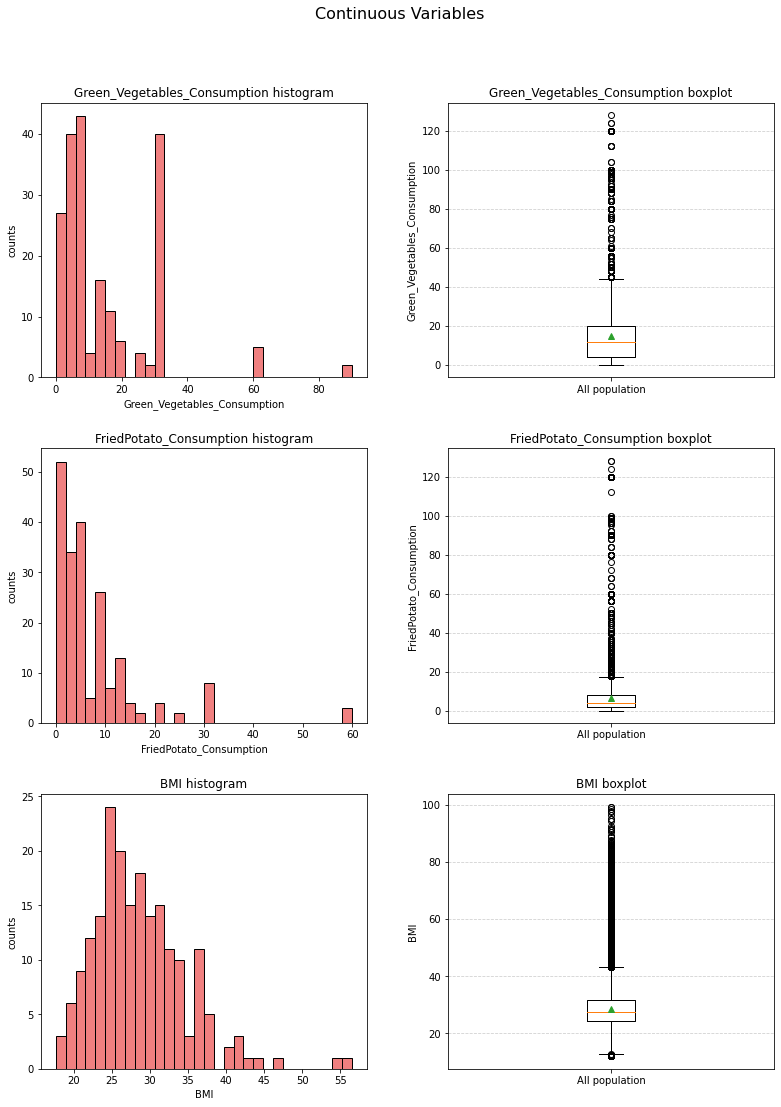

In [5]:
continuous_variables= ["Green_Vegetables_Consumption", "FriedPotato_Consumption", "BMI"]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
fig.suptitle('Continuous Variables', fontsize=16)
fig.tight_layout(pad=5.0)
for i,col in enumerate(continuous_variables): 
    axs[i][0].hist(df_sample[col], bins=30, ec="black", color="lightcoral")
    axs[i][0].set(ylabel="counts", xlabel= col, title=col +" histogram")
    axs[i][1].yaxis.grid(True, alpha=0.6, linestyle='--')
    axs[i][1].boxplot(df[col], showmeans=True)
    axs[i][1].set(xticks=[1], xticklabels=["All population"], ylabel=col, title=col +" boxplot")

plt.show()

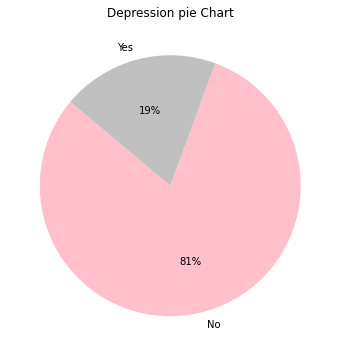

In [6]:
binary_variables = ["Depression"]
colors = ['pink', 'silver']

for i,col in enumerate(binary_variables): 
    col_counts = df_sample[[col]].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(col_counts, labels=df[col].unique().tolist(), autopct='%1.00f%%', startangle=140, colors = colors)
    plt.title(col + ' pie Chart')
    plt.show()


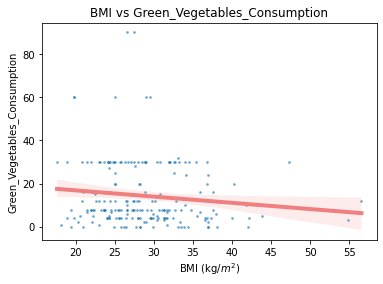

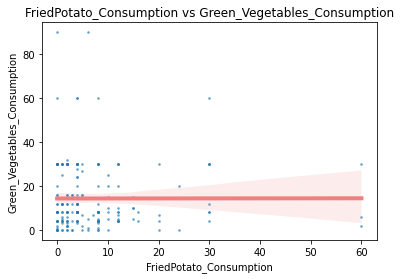

In [7]:
sns.regplot(data=df_sample, x="BMI",y="Green_Vegetables_Consumption", 
            scatter_kws={'s': 3, 'alpha': 0.5}, 
            line_kws={'lw':4, 'color':"lightcoral"}).set(title="BMI vs Green_Vegetables_Consumption",
                                                  xlabel="BMI (kg/$m^2$)", ylabel="Green_Vegetables_Consumption")
plt.show()


sns.regplot(data=df_sample, x="FriedPotato_Consumption",y="Green_Vegetables_Consumption", 
            scatter_kws={'s': 3, 'alpha': 0.5}, 
            line_kws={'lw':4, 'color':"lightcoral"}).set(title="FriedPotato_Consumption vs Green_Vegetables_Consumption",
                                                  xlabel="FriedPotato_Consumption", ylabel="Green_Vegetables_Consumption")
plt.show()


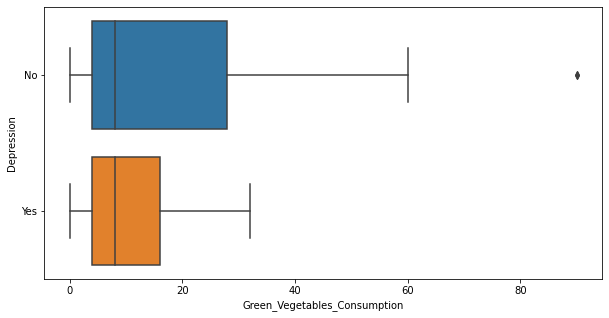

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data =df_sample, x="Green_Vegetables_Consumption", y="Depression")
plt.show()

Calculating the beta coefficient vector according to the sample data:
<br>
$\hat{\beta} = (X^tX)^{-1}X^ty$

In [9]:
df["Depression"] = df["Depression"].replace({'No':-1, 'Yes':1})
df_sample["Depression"] = df_sample["Depression"].replace({'No':-1, 'Yes':1})

def adi_and_tamar_linear_reg(df):
    X = df[["FriedPotato_Consumption", "BMI", "Depression"]].to_numpy()
    X = np.c_[np.ones(X.shape[0]), X]
    XTX_inverse = np.linalg.inv(np.matmul(X.T, X))
    y = df["Green_Vegetables_Consumption"].to_numpy()
    XTy = np.matmul(X.T, y)
    beta_estimate = np.matmul(XTX_inverse,XTy)
    return beta_estimate
    
def print_beta(beta_estimate):
    print("Beta 0: ",round(beta_estimate[0],3))
    print("Beta 1 (fried potatos consumption): ", round(beta_estimate[1],3))
    print("Beta 2 (BMI): ", round(beta_estimate[2],3))
    print("Beta 3 (depression): ", round(beta_estimate[3],3))
    

In [10]:
beta_estimate = adi_and_tamar_linear_reg(df_sample)
print_beta(beta_estimate)

Beta 0:  20.817
Beta 1 (fried potatos consumption):  0.015
Beta 2 (BMI):  -0.26
Beta 3 (depression):  -1.484


In [11]:
y = df_sample["Green_Vegetables_Consumption"].to_numpy()
X = df_sample[["FriedPotato_Consumption", "BMI", "Depression"]].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]
y_mean = np.mean(y)
y_estimate = np.matmul(X, beta_estimate)
n = y.shape[0]
p = 4

SS_R = sum((y_est - y_mean)**2 for y_est in y_estimate)
SS_Res = sum((y[i]-y_estimate[i])**2 for i in range (n))
SS_total = sum(((y[i]-y_mean)**2) for i in range(n))

print("Anova Table")
print("**Sum squares:")
print("Regression: ", round(SS_R,2))
print("Errors: ", round(SS_Res,2))
print("Total: ",round(SS_total,2))

df_regression = p-1
df_res = n-p
df_total = n-1

print("**Degree of freedom:")
print("Regression: ", df_regression)
print("Errors: ", df_res)
print("Total: ",df_total)

MS_regression = SS_R/df_regression
MS_res =SS_Res /df_res
MS_total = SS_total/df_total

print("**Mean squared error:")
print("Regression: ", round(MS_regression,2))
print("Errors: ", round(MS_res,2))
print("Total: ",round(MS_total,2))

F_statistic = MS_regression/ MS_res
print("F statistic: ",round(F_statistic,2))
p_value = 1-stats.f.cdf(F_statistic,df_regression,df_res)
print("P value: ", round(p_value,2))
R_squared = SS_R/SS_total
print("R squared: ", round(R_squared,2))
R_squared_adj = 1- (MS_res/MS_total)
print("R squared adj: ", round(R_squared_adj,2))

Anova Table
**Sum squares:
Regression:  908.98
Errors:  43247.1
Total:  44156.08
**Degree of freedom:
Regression:  3
Errors:  196
Total:  199
**Mean squared error:
Regression:  302.99
Errors:  220.65
Total:  221.89
F statistic:  1.37
P value:  0.25
R squared:  0.02
R squared adj:  0.01


Confidence Intervals for regression coefficients, according to the sample data.
<br>
We are using Wald's statistic to check the hypothesis that the coefficient equal to zero: $H_0:\beta_j=0, H_1:\beta_j\neq 0$ for each j= 0,1,2,3

In [12]:
e = y - y_estimate
noise_var = 1/(n-p)*sum(i**2 for i in e)
C =  np.linalg.inv(np.matmul(X.T, X))
z = stats.norm.ppf(0.975)

for i in range (beta_estimate.shape[0]):
    se = (noise_var*C[i][i])**0.5
    lower = beta_estimate[i]-(z*se)
    upper = beta_estimate[i]+(z*se)
    print("Confidence interval 95% for beta"+ str(i)+ ":\n(",round(lower,3), ",", round(upper,3),")")
    W = beta_estimate[i]/se
    print("W-statistic: ", round(W,3))
    print("Reject the null hypothesis: ", abs(W)>z)
    print("-----------------")

Confidence interval 95% for beta0:
( 10.537 , 31.097 )
W-statistic:  3.969
Reject the null hypothesis:  True
-----------------
Confidence interval 95% for beta1:
( -0.202 , 0.232 )
W-statistic:  0.134
Reject the null hypothesis:  False
-----------------
Confidence interval 95% for beta2:
( -0.598 , 0.078 )
W-statistic:  -1.508
Reject the null hypothesis:  False
-----------------
Confidence interval 95% for beta3:
( -4.114 , 1.147 )
W-statistic:  -1.105
Reject the null hypothesis:  False
-----------------


In [13]:
beta_estimate_full = adi_and_tamar_linear_reg(df)
print_beta(beta_estimate_full)

Beta 0:  18.874
Beta 1 (fried potatos consumption):  0.012
Beta 2 (BMI):  -0.151
Beta 3 (depression):  -0.821


Checking the linear assumption:

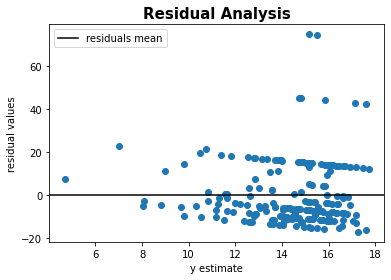

In [14]:
plt.scatter(y_estimate, e)
plt.axhline(y=e.mean(), color = "black", label = "residuals mean")
plt.xlabel("y estimate")
plt.ylabel("residual values")
plt.title("Residual Analysis", fontweight = "bold", fontsize = 15)
plt.legend()
plt.show()

Regardless a few outlires, our graph is unbiased and homoscedastic.
Meaning the residuals average to zero in each thin verical strip and the SD is the same all across the plot.
Therefore, the linear assumption is likely, and so the assumption of variance equality.

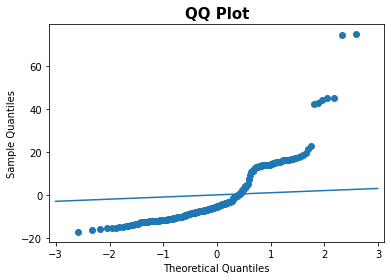

In [15]:
import statsmodels.graphics.gofplots as sm
sm.qqplot(e)
plt.plot(np.arange(-3,3,0.01), np.arange(-3,3,0.01))
plt.title("QQ Plot", fontweight = "bold", fontsize = 15)
plt.show()

According to the qq-plot above, we can't assume that to noise in the sample is normal.

Predicting the label and the confidence interval of a new observations:

In [16]:
df_all = df.merge(df_sample, how='left', indicator=True)
not_in_sample = df_all[df_all["_merge"] == "left_only"]
new_1000 = not_in_sample.sample(1000).drop("_merge", axis=1)

In [17]:
FriedPotato_Consumption = new_1000["FriedPotato_Consumption"].to_numpy()
BMI = new_1000["BMI"].to_numpy()
Depression = new_1000["Depression"].to_numpy()
z = stats.norm.ppf(0.975)
X_1000 = new_1000[["FriedPotato_Consumption", "BMI", "Depression"]].to_numpy()
X_1000 = np.c_[np.ones(X_1000.shape[0]), X_1000]
y_1000_true = new_1000["Green_Vegetables_Consumption"].to_numpy()

y_new_in_CI = 0
for i in range(1000):
    y_1000 = [beta_estimate[0]+FriedPotato_Consumption[i]*beta_estimate[1]+\
    BMI[i]*beta_estimate[2]+Depression[i]*beta_estimate[3]]
    
    X_T_C = np.matmul(X_1000[i].T,C)
    X_T_C_X = np.matmul(X_T_C, X_1000[i])
    y_1000_lower = [y_1000- z*(noise_var*X_T_C_X+noise_var)**0.5]
    y_1000_upper = [y_1000+ z*(noise_var*X_T_C_X+noise_var)**0.5]
    
    if (y_1000_lower<=y_1000_true[i]<=y_1000_upper):
        y_new_in_CI=y_new_in_CI+1

print(y_new_in_CI/1000,"% of the predictrd label are in the confidence interval")

0.962 % of the predictrd label are in the confidence interval


Calculting the regression coefficients with interaction terms:

In [18]:
df_sample_FP = df_sample["FriedPotato_Consumption"].to_numpy()
df_sample_BMI = df_sample["BMI"].to_numpy()
df_sample_D = df_sample["Depression"].to_numpy()

df_sample_FP_BMI = np.multiply(df_sample_FP, df_sample_BMI)
df_sample_FP_D = np.multiply(df_sample_FP, df_sample_D)
df_sample_BMI_D = np.multiply(df_sample_D, df_sample_BMI)

X_q10 = np.c_[X, df_sample_FP_BMI]
X_q10 = np.c_[X_q10,df_sample_FP_D]
X_q10 = np.c_[X_q10,df_sample_BMI_D]

XTX_inverse_q10 = np.linalg.inv(np.matmul(X_q10.T, X_q10))
y_q10 = df_sample["Green_Vegetables_Consumption"].to_numpy()
XTy_q10 = np.matmul(X_q10.T, y_q10)

beta_estimate_q10 = np.matmul(XTX_inverse_q10,XTy_q10)
print("Beta 0: ",round(beta_estimate_q10[0],3))
print("Beta 1 (for friedPotato consumption): ", round(beta_estimate_q10[1],3))
print("Beta 2 (for BMI): ", round(beta_estimate_q10[2],3))
print("Beta 3 (for depression): ", round(beta_estimate_q10[3],3))
print("Beta 12: ",round(beta_estimate_q10[4],3))
print("Beta 13: ",round(beta_estimate_q10[5],3))
print("Beta 23: ",round(beta_estimate_q10[6],3))


Beta 0:  10.245
Beta 1 (for friedPotato consumption):  0.965
Beta 2 (for BMI):  0.088
Beta 3 (for depression):  -11.726
Beta 12:  -0.032
Beta 13:  -0.045
Beta 23:  0.351


In [19]:
#R_squared_adj
y_q10_mean = np.mean(y_q10)
y_estimate_q10 = np.matmul(X_q10, beta_estimate_q10)
n_q10 = 200
p_q10 = 7

SS_Res_q10 = sum((y_q10[i]-y_estimate_q10[i])**2 for i in range (n_q10))
SS_total_q10 = sum(((y_q10[i]-y_q10_mean)**2) for i in range(n_q10))

R_squared_adj_q10 = 1-((n_q10-1)/(n_q10-p_q10))*(SS_Res_q10/SS_total_q10)
print("R squared adj for the new model: ", round(R_squared_adj_q10,3))
print("Remainder: the R squared adj for the previous model was: ", round(R_squared_adj,3))

R squared adj for the new model:  0.031
Remainder: the R squared adj for the previous model was:  0.006


In [20]:
#Mallow's C_p statistic

e_q10 = y_q10 - y_estimate_q10
noise_var_q10 = 1/(n_q10-p_q10)*sum(i**2 for i in e_q10)

Mallows_new = SS_Res_q10+(2*7*noise_var_q10)
Mallows_prev = SS_Res+(2*4*noise_var)
print("Mallow's C_p statistic for the new model: ", Mallows_new)
print("Mallow's C_p statistic for the previous model: ",Mallows_prev)

Mallow's C_p statistic for the new model:  44494.753585455815
Mallow's C_p statistic for the previous model:  45012.290782003154


According Mallow's CP and R squared adjusted we will prefer the new model (with interacts) because it's minimizes the measure.

### Logistic Regression

#### In this section, we will analyze the effect of diabetes, smoking history and BMI on heart diseases.

### Preliminary Analysis

In [21]:
np.random.seed(5)
data_sample = df.sample(n=200)

In [22]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 9120 to 8323
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                200 non-null    object 
 1   Checkup                       200 non-null    object 
 2   Exercise                      200 non-null    object 
 3   Heart_Disease                 200 non-null    object 
 4   Skin_Cancer                   200 non-null    object 
 5   Other_Cancer                  200 non-null    object 
 6   Depression                    200 non-null    int64  
 7   Diabetes                      200 non-null    object 
 8   Arthritis                     200 non-null    object 
 9   Sex                           200 non-null    object 
 10  Age_Category                  200 non-null    object 
 11  Height_(cm)                   200 non-null    int64  
 12  Weight_(kg)                   200 non-null    float64
 13  B

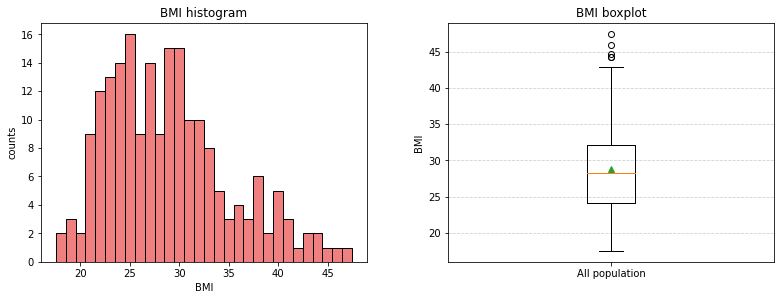

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.tight_layout(pad=5.0)
axs[0].hist(data_sample["BMI"], bins=30, ec="black", color="lightcoral")
axs[0].set(ylabel="counts", xlabel= "BMI", title="BMI" +" histogram")
axs[1].yaxis.grid(True, alpha=0.6, linestyle='--')
axs[1].boxplot(data_sample["BMI"], showmeans=True)
axs[1].set(xticks=[1], xticklabels=["All population"], ylabel="BMI", title="BMI" +" boxplot")

plt.show()

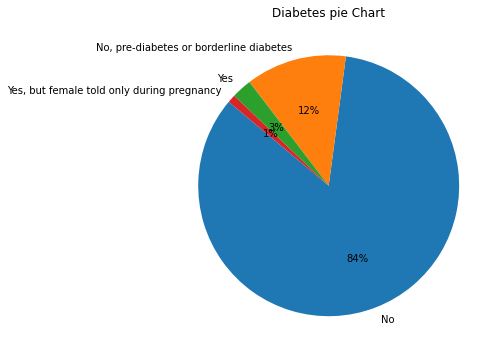

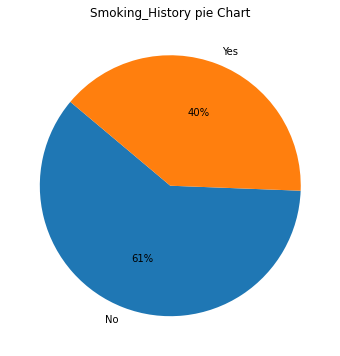

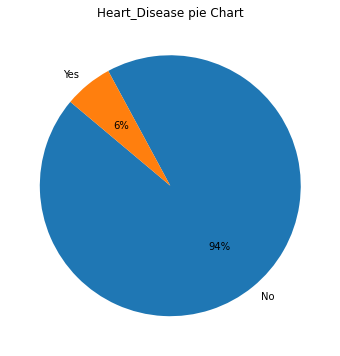

In [24]:
binarial_variables = ["Diabetes", "Smoking_History", "Heart_Disease"]

for i,col in enumerate(binarial_variables): 
    col_counts = data_sample[[col]].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(col_counts, labels=data_sample[col].unique().tolist(), autopct='%1.00f%%', startangle=140)
    plt.title(col + ' pie Chart')
    plt.show()


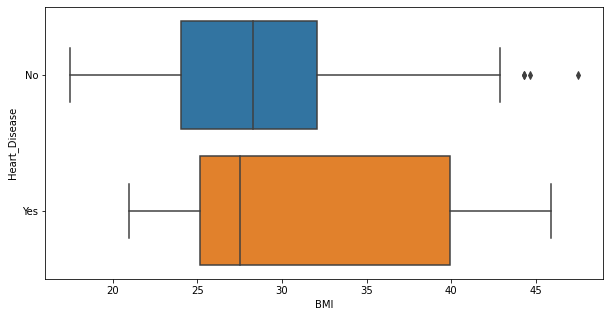

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data =data_sample, x="BMI", y="Heart_Disease")
plt.show()

Calculating the beta coefficient vector according to the sample data:
<br>
$\sum \limits _{i=1} ^{n} (Y_i-\pi_i)X_i=0$

In [26]:
import statsmodels.api as stm

data_sample["Heart_Disease"] = data_sample["Heart_Disease"].replace({'No':0, 'Yes':1})
data_sample["Diabetes"] = data_sample["Diabetes"].replace({'No':0, 'Yes':1, 'No, pre-diabetes or borderline diabetes': 0.66,'Yes, but female told only during pregnancy':0.33})
data_sample["Smoking_History"] = data_sample["Smoking_History"].replace({'No':0, 'Yes':1})

X_logR= data_sample[["BMI", "Diabetes", "Smoking_History"]]
X_logR = np.c_[np.ones(X_logR.shape[0]), X_logR]
y_logR = data_sample[["Heart_Disease"]]
reg = stm.Logit(y_logR,X_logR).fit()
reg.params

Optimization terminated successfully.
         Current function value: 0.215753
         Iterations 7


const   -4.474214
x1       0.044153
x2       1.059039
x3       0.381407
dtype: float64

This means that:<br>
If we get one point more in the BMI score, the probability of getting heart disease increased 0.044153 times.<br>
For diabetics, the probability of getting heart disease increased 1.059039 times.<br>
For smokers, the probability of getting heart disease increased 0.381407 times.

Confidence Intervals for regression coefficients, according to the sample data:

In [27]:
beta_est_logR = reg.params.to_numpy()

def logisitic(i):
    e_power_eta = np.exp(np.matmul(beta_est_logR.T, X_logR[i]))
    return (e_power_eta/(1+e_power_eta))

V_diag_vec = [logisitic(i)*(1-logisitic(i)) for i in range(X.shape[0])]
V = np.diag(V_diag_vec)
Xt_V = np.matmul(X_logR.T, V)
Xt_V_X = np.matmul(Xt_V, X_logR)

def calc_CI(j):
    lower = beta_est_logR[j]-stats.norm.ppf(0.975)*((1/(Xt_V_X[j][j]))**0.5)
    upper = beta_est_logR[j]+stats.norm.ppf(0.975)*((1/(Xt_V_X[j][j]))**0.5)
    return lower, upper

for i in range (4):
    l, u = calc_CI(i)
    print("Beta", i, "confidence interval: [",l, ", ", u,"]")

Beta 0 confidence interval: [ -5.066584519484181 ,  -3.8818437103143246 ]
Beta 1 confidence interval: [ 0.02550598841339465 ,  0.06280060096692962 ]
Beta 2 confidence interval: [ -0.031554316220283374 ,  2.14963306656354 ]
Beta 3 confidence interval: [ -0.4664978415424444 ,  1.2293120134938917 ]


Calculating the beta coefficient vector according to the full database:

In [28]:
df["Heart_Disease"] = df["Heart_Disease"].replace({'No':0, 'Yes':1})
df["Diabetes"] = df["Diabetes"].replace({'No':0, 'Yes':1, 'No, pre-diabetes or borderline diabetes': 0.66,'Yes, but female told only during pregnancy':0.33})
df["Smoking_History"] = df["Smoking_History"].replace({'No':0, 'Yes':1})

X_logR_df= df[["BMI", "Diabetes", "Smoking_History"]]
X_logR_df = np.c_[np.ones(X_logR_df.shape[0]), X_logR_df]
y_logR_df = df[["Heart_Disease"]]
reg_df = stm.Logit(y_logR_df,X_logR_df).fit()
reg_df.params

Optimization terminated successfully.
         Current function value: 0.263212
         Iterations 7


const   -3.149876
x1       0.001864
x2       1.342684
x3       0.733567
dtype: float64